<a href="https://colab.research.google.com/github/anjalipatel7902/Brain-Tumor-Detection/blob/main/Brain_Tumor_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!wget https://www.dropbox.com/scl/fi/5c3mytmwn0zve57maqk8u/brain_tumor_detection.zip?rlkey=mjn7vwso3rcb32x07qjqipnav&dl=0

--2023-12-21 10:39:44--  https://www.dropbox.com/scl/fi/5c3mytmwn0zve57maqk8u/brain_tumor_detection.zip?rlkey=mjn7vwso3rcb32x07qjqipnav
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf9c399f3b7a6ad3bd3ea52f597.dl.dropboxusercontent.com/cd/0/inline/CJ1PpiWkQvCU1l9sAcrt0t4REquxeYrt9lb-B0WFnsVbWSv22LvXqDsXh_T7Z7EsSOzbiUBmS762XqwjonNy-c6KbMEJjmFvz2w_Ej3JKorRShi6OZG63_drLLcXU_Njjc4SQzEtAlWAtPyue0BqhLwA/file# [following]
--2023-12-21 10:39:45--  https://ucf9c399f3b7a6ad3bd3ea52f597.dl.dropboxusercontent.com/cd/0/inline/CJ1PpiWkQvCU1l9sAcrt0t4REquxeYrt9lb-B0WFnsVbWSv22LvXqDsXh_T7Z7EsSOzbiUBmS762XqwjonNy-c6KbMEJjmFvz2w_Ej3JKorRShi6OZG63_drLLcXU_Njjc4SQzEtAlWAtPyue0BqhLwA/file
Resolving ucf9c399f3b7a6ad3bd3ea52f597.dl.dropboxusercontent.com (ucf9c399f3b7a6ad3bd3ea52f597.dl.dropboxusercontent.com)... 162.12

In [ ]:
!unzip /content/brain_tumor_detection.zip?rlkey=mjn7vwso3rcb32x07qjqipnav

Streaming output truncated to the last 5000 lines.
  inflating: Training/glioma/Tr-gl_0712.jpg  
  inflating: Training/glioma/Tr-gl_0713.jpg  
  inflating: Training/glioma/Tr-gl_0714.jpg  
  inflating: Training/glioma/Tr-gl_0715.jpg  
  inflating: Training/glioma/Tr-gl_0716.jpg  
  inflating: Training/glioma/Tr-gl_0717.jpg  
  inflating: Training/glioma/Tr-gl_0718.jpg  
  inflating: Training/glioma/Tr-gl_0719.jpg  
  inflating: Training/glioma/Tr-gl_0720.jpg  
  inflating: Training/glioma/Tr-gl_0721.jpg  
  inflating: Training/glioma/Tr-gl_0722.jpg  
  inflating: Training/glioma/Tr-gl_0723.jpg  
  inflating: Training/glioma/Tr-gl_0724.jpg  
  inflating: Training/glioma/Tr-gl_0725.jpg  
  inflating: Training/glioma/Tr-gl_0726.jpg  
  inflating: Training/glioma/Tr-gl_0727.jpg  
  inflating: Training/glioma/Tr-gl_0728.jpg  
  inflating: Training/glioma/Tr-gl_0729.jpg  
  inflating: Training/glioma/Tr-gl_0730.jpg  
  inflating: Training/glioma/Tr-gl_0731.jpg  
  inflating: Training/glioma/

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
# os to get file directories
import math
import shutil
# shutil to file from one folder to other
import glob

In [ ]:
ROOT_DIR ="/content/Training"
number_of_images={}
for dir in os.listdir(ROOT_DIR):
  number_of_images[dir]=len(os.listdir(os.path.join(ROOT_DIR,dir)))

In [ ]:
number_of_images.items()

dict_items([('meningioma', 1339), ('glioma', 1321), ('notumor', 1595), ('pituitary', 1457)])

In [ ]:
def dataFolder(p, split):
    if not os.path.exists("./" + p):
        os.mkdir("./" + p)
        for dir in os.listdir(ROOT_DIR):
            dest_dir = os.path.join("./" + p, dir)
            os.makedirs(dest_dir, exist_ok=True)
            chosen_images = np.random.choice(
                a=os.listdir(os.path.join(ROOT_DIR, dir)),
                size=(math.floor(split * number_of_images[dir]) - 5),
                replace=False
            )
            for img in chosen_images:
                source_path = os.path.join(ROOT_DIR, dir, img)
                destination_path = os.path.join(dest_dir, img)
                shutil.copy(source_path, destination_path)
                os.remove(source_path)

    else:
        print(f"{p} Folder exists")

In [ ]:
dataFolder("train",0.7)

In [ ]:
dataFolder("validation",0.15)

In [ ]:
dataFolder("test",0.15)

In [ ]:
number_of_images={}
for dir in os.listdir(ROOT_DIR):
  number_of_images[dir]=len(os.listdir(os.path.join(ROOT_DIR,dir)))
number_of_images.items()

dict_items([('meningioma', 17), ('glioma', 16), ('notumor', 16), ('pituitary', 17)])

Model Building

In [ ]:
from keras.layers import Conv2D ,MaxPool2D, Dropout, Flatten , Dense , BatchNormalization, GlobalAveragePooling2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import keras

In [ ]:
model = Sequential()
model.add(Conv2D(filters=16,kernel_size=(3,3),activation ='relu', input_shape=(224,224,3)))

model.add(Conv2D(filters=36,kernel_size=(3,3),activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=256,kernel_size=(3,3),activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=64,activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 36)      5220      
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 36)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      20800     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 128)       7

In [ ]:
model.compile(optimizer='adam', loss=keras.losses.binary_crossentropy, metrics=['accuracy'])

In [ ]:
def preprocessingImages1(path):
  image_data= ImageDataGenerator(zoom_range=0.2,shear_range=0.2,rescale=1/255,horizontal_flip=True)
  image = image_data.flow_from_directory(directory=path, target_size=(224,224), batch_size=32,
                                         class_mode='binary')

  return image

In [ ]:
path="/content/train"
train_data= preprocessingImages1(path)

Found 3976 images belonging to 4 classes.


In [ ]:
def preprocessingImages2(path):
  image_data= ImageDataGenerator(rescale=1/255)
  image = image_data.flow_from_directory(directory=path, target_size=(224,224),
                                         batch_size=32, class_mode='binary')

  return image

In [ ]:
path="/content/test"
test_data=preprocessingImages2(path)

Found 835 images belonging to 4 classes.


In [ ]:
path="/content/validation"
val_data=preprocessingImages2(path)

Found 835 images belonging to 4 classes.


In [ ]:
from keras.callbacks import ModelCheckpoint , EarlyStopping
es =EarlyStopping(monitor="val_accuracy",min_delta=0.01, patience=5,verbose=1, mode='auto')

mc = ModelCheckpoint(monitor="val_accuracy",filepath="./bestmodel.h5",verbose =1, save_best_only=True, mode='auto')

cd=[es,mc]

In [ ]:
hs=model.fit_generator(generator=train_data, steps_per_epoch=8,epochs=30,verbose=1,
                            validation_data=val_data, validation_steps=16, callbacks=cd)

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: -147.5633 - accuracy: 0.2266
Epoch 1: val_accuracy improved from -inf to 0.24219, saving model to ./bestmodel.h5
8/8 [==============================] - 17s 753ms/step - loss: -147.5633 - accuracy: 0.2266 - val_loss: -1024.8011 - val_accuracy: 0.2422
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: -9458.6973 - accuracy: 0.2617
Epoch 2: val_accuracy improved from 0.24219 to 0.25195, saving model to ./bestmodel.h5
8/8 [==============================] - 9s 1s/step - loss: -9458.6973 - accuracy: 0.2617 - val_loss: -48366.7461 - val_accuracy: 0.2520
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: -255030.0156 - accuracy: 0.2188
Epoch 3: val_accuracy did not improve from 0.25195
8/8 [==============================] - 5s 649ms/step - loss: -255030.0156 - accuracy: 0.2188 - val_loss: -979300.5625 - val_accuracy: 0.2188
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: -2869532.5

In [ ]:
h= hs.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

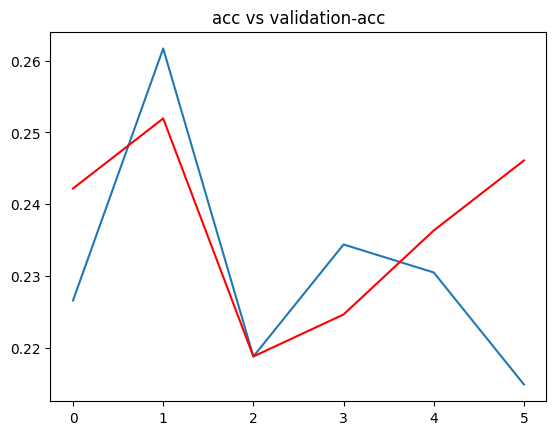

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'],c='red')
plt.title("acc vs validation-acc")
plt.show()

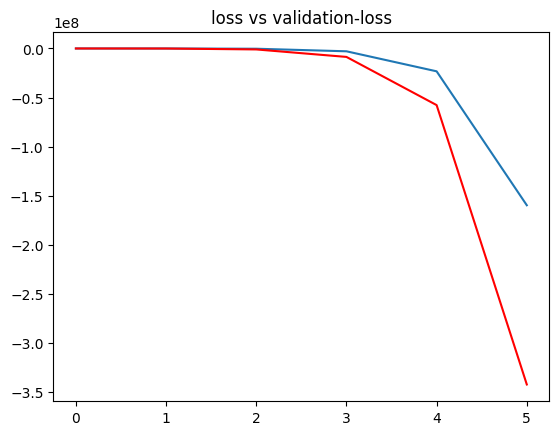

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'],c='red')
plt.title("loss vs validation-loss")
plt.show()

In [ ]:
from keras.models import load_model
model=load_model("/content/bestmodel.h5")

In [ ]:
acc= model.evaluate_generator(test_data)[1]
print(f"the accuracy of our model is {acc*100} %")

the accuracy of our model is 23.353293538093567 %


In [ ]:
from keras.preprocessing.image import load_img, img_to_array

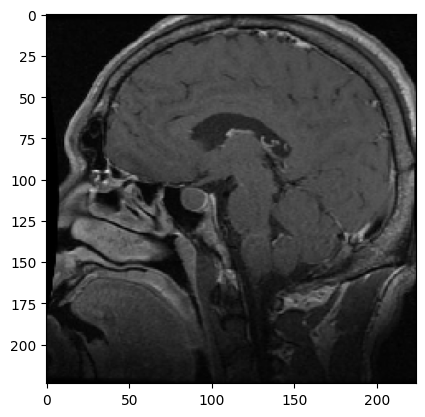

1/1 [==============================] - 1s 819ms/step
[[1.]]
the MRI is having a tumor and have 10-15% of being cancerous


In [ ]:
path="/content/Training/pituitary/Tr-pi_0090.jpg"
img= load_img(path, target_size =(224,224))
input_arr= img_to_array(img)/255
plt.imshow(input_arr)
plt.show()

input_arr.shape
input_arr = np.expand_dims(input_arr,axis=0)
pred = model.predict(input_arr)
print(pred)
if pred ==0:
  print("the MRI is having a tumor and is cancerous")
elif pred ==1:
  print("the MRI is having a tumor and have 10-15% of being cancerous")
elif pred==2:
  print("the MRI is not having any tumor")
else:
  print("the MRI is having tumor but is non-cancerous")